# Matrix norms

In [1]:
using FundamentalsNumericalComputation

In [2]:
A = [ 2  0; 1  -1 ]

2×2 Array{Int64,2}:
 2   0
 1  -1

In Julia one uses `norm` for vector norms and for the Frobenius norm of a matrix, which is like stacking the matrix into a single vector before taking the 2-norm. 

In [4]:
Fronorm = norm(A)

2.449489742783178

Most of the time we really want to use `opnorm` for an induced matrix norm. The default is the 2-norm.

In [5]:
opnorm(A)

2.2882456112707374

You can get the 1-norm as well.

In [3]:
onenorm = opnorm(A,1)

3.0

The 1-norm is equivalent to

In [4]:
maximum( sum(abs.(A),dims=1) )   # sum down the rows (1st matrix dimension)

3

Similarly, we can get the $\infty$-norm and check our formula for it.

In [5]:
infnorm = opnorm(A,Inf)

2.0

In [6]:
maximum( sum(abs.(A),dims=2) )   # sum across columns (2nd matrix dimension)

2

Here we illustrate the geometric interpretation of the 2-norm. First, we will sample a lot of vectors on the unit circle in $\mathbb{R}^2$.

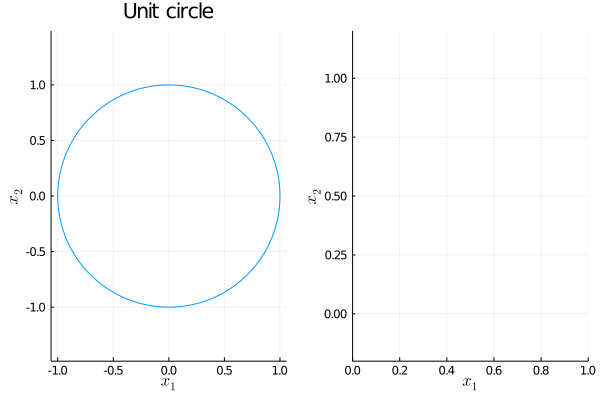

In [6]:
theta = 2pi*(0:1/600:1)
x = [ fun(t) for fun in [cos,sin], t in theta ]    # 601 unit columns

plot(aspect_ratio=1, layout=(1,2), leg=:none, xlabel="\$x_1\$", ylabel="\$x_2\$")
plot!(x[1,:],x[2,:],subplot=1,title="Unit circle") 

We can apply `A` to every column of `x` simply by using a matrix multiplication.

In [12]:
Ax = A*x;

The image of the transformed vectors is an ellipse. 

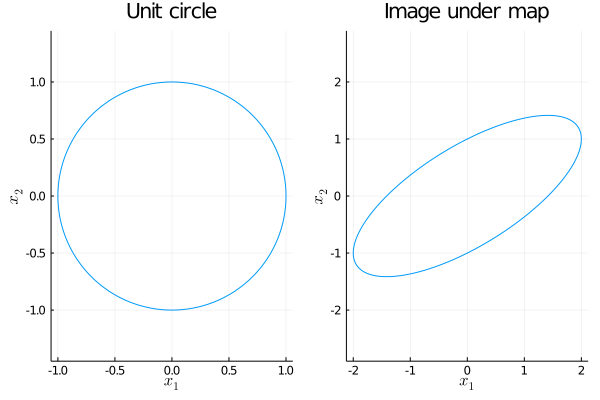

In [13]:
plot!(Ax[1,:],Ax[2,:],subplot=2,title="Image under map")

That ellipse just touches the circle of radius $\|A\|_2$.

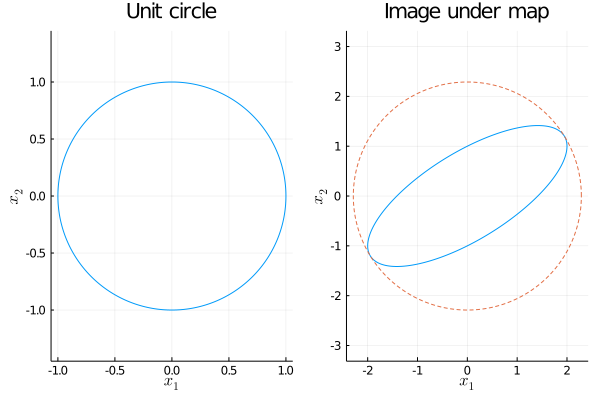

In [14]:
plot!(twonorm*x[1,:],twonorm*x[2,:],subplot=2,l=:dash)